# Reuters newswires

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2121728/2110848 [==============================] - 13s 6us/step


8,982 training examples and 2,246 test examples

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [3]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


### Building the network

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validation

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training the model 

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 236us/step - loss: 2.5251 - acc: 0.4949 - val_loss: 1.7190 - val_acc: 0.6150
Epoch 2/20
7982/7982 [==============================] - 1s 136us/step - loss: 1.4457 - acc: 0.6882 - val_loss: 1.3504 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.0989 - acc: 0.7636 - val_loss: 1.1735 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.8711 - acc: 0.8153 - val_loss: 1.0840 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.7034 - acc: 0.8488 - val_loss: 0.9859 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.5670 - acc: 0.8806 - val_loss: 0.9412 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.4614 - acc: 0.9045 - val_loss: 0.9091 - val_acc: 0.8070


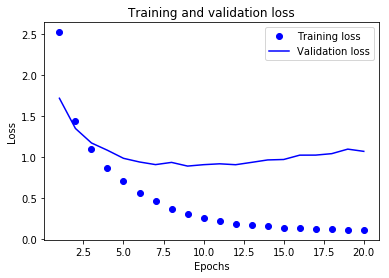

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

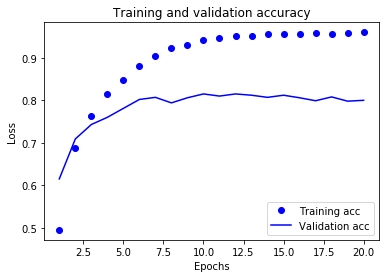

In [10]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


We can see again, that for this example the model starts to overfit after 9 epoch, so we will train the model again for only 9 epoch. 

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 154us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 116us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2747 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 113us/step - loss: 1.0425 - acc: 0.7786 - val_loss: 1.1035 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.8180 - acc: 0.8324 - val_loss: 1.0272 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 144us/step - loss: 0.6506 - acc: 0.8627 - val_loss: 0.9516 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.5295 - acc: 0.8900 - val_loss: 0.9206 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.4210 - acc: 0.9114 - val_loss: 0.9005 - val_acc: 0.8140
Epoch 8

In [14]:
results

[0.9842278851214414, 0.7858414960459524]

### Predictions on data

In [15]:
predictions = model.predict(x_test)

In [16]:
predictions[0].shape

(46,)

In [17]:
np.sum(predictions[0])

1.0000002

In [18]:
np.argmax(predictions[0])

3

This means that the first example in the test set belongs to the 4th class

In [19]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [20]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

## Alternative models

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 2.7476 - acc: 0.4079 - val_loss: 2.0170 - val_acc: 0.5800
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.6357 - acc: 0.6151 - val_loss: 1.5335 - val_acc: 0.6250
Epoch 3/20
7982/7982 [==============================] - 1s 151us/step - loss: 1.3292 - acc: 0.6431 - val_loss: 1.4314 - val_acc: 0.6410
Epoch 4/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.1627 - acc: 0.6988 - val_loss: 1.3609 - val_acc: 0.6870
Epoch 5/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0244 - acc: 0.7551 - val_loss: 1.3144 - val_acc: 0.7010
Epoch 6/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.9160 - acc: 0.7776 - val_loss: 1.3281 - val_acc: 0.7120
Epoch 7/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.8330 - acc: 0.7917 - val_loss: 1.3012 - val_acc: 0.7240


In [24]:
results

[0.9842278851214414, 0.7858414960459524]